In [10]:
import pandas as pd

# Load the CSV files
df_pred = pd.read_csv(r'C:\Users\Daniel\Desktop\Bachelor\Bachelor2\PredictionResultFemale.csv')
df_comments = pd.read_csv(r'C:\Users\Daniel\Desktop\Bachelor\Bachelor2\youtube_female football_comments.csv')

# Filter the demographic column for entries containing 'female' or 'male'
df_pred_filtered = df_pred[df_pred['demographic'].str.contains('female|male', case=False, na=False)]

df_pred_filtered['demographic'] = df_pred_filtered['demographic'].apply(
    lambda x: 'female' if 'female' in x.lower() else ('male' if 'male' in x.lower() else x)
)

# Merge the two dataframes on the 'author' column
merged_df = pd.merge(df_pred_filtered, df_comments, left_on='name',right_on='author', how='inner')

# (Optional) Show the result
print(merged_df.head())

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_output_female.csv', index=False)



   Unnamed: 0                 name demographic     video_id  \
0           7            @its_YZee      female  V2_GU-0jNfw   
1           9    @Papa_junior-1987        male  V2_GU-0jNfw   
2          14         @berlin_7301      female  V2_GU-0jNfw   
3          23         @Ebi.Adonkie        male  V2_GU-0jNfw   
4          24  @just.everythings11      female  V2_GU-0jNfw   

                                             comment               author  \
0                     Well done ladies, I'm so proud            @its_YZee   
1                           barcelona champions 2025    @Papa_junior-1987   
2                         Barca tetep beda level sih         @berlin_7301   
3                          Lyon cant catch a break 😂         @Ebi.Adonkie   
4  Alessia Russo one lf my Favorite player In fin...  @just.everythings11   

   like_count          published_at  
0           0  2025-04-28T06:31:01Z  
1           0  2025-04-28T06:15:29Z  
2           0  2025-04-28T06:04:31Z  
3     

C:\Users\Daniel\AppData\Local\Temp\ipykernel_11124\1677613468.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_filtered['demographic'] = df_pred_filtered['demographic'].apply(


Male dataset shape: (75, 14)
Female dataset shape: (128, 14)

Male dataset sample:


,Unnamed: 0,name,demographic,video_id,comment,author,like_count,published_at,sexism,racism,violence,appearance,ability,non-offensive
0,1,@jacket2486,male,iMkZ84zYras,"Ronaldo is Tough, not like messy",@jacket2486,0,2025-04-28T06:14:26Z,0,0,0,0,0,1
1,6,@dream_bear13,female,iMkZ84zYras,But both are still goats,@dream_bear13,0,2025-04-27T17:54:58Z,0,0,0,0,0,1



Female dataset sample:


,Unnamed: 0,name,demographic,video_id,comment,author,like_count,published_at,sexism,racism,violence,appearance,ability,non-offensive
0,7,@its_YZee,female,V2_GU-0jNfw,"Well done ladies, I'm so proud",@its_YZee,0,2025-04-28T06:31:01Z,0,0,0,0,0,1
1,9,@Papa_junior-1987,male,V2_GU-0jNfw,barcelona champions 2025,@Papa_junior-1987,0,2025-04-28T06:15:29Z,0,0,0,0,0,1


,category,male_raw,female_raw,male_normalized,female_normalized,difference,male_count,female_count
0,sexism,0,25,0.000000,19.53125,19.531250,75,128
1,racism,0,5,0.000000,3.90625,3.906250,75,128
2,violence,2,3,2.666667,2.34375,-0.322917,75,128
3,appearance,0,5,0.000000,3.90625,3.906250,75,128
4,ability,0,16,0.000000,12.50000,12.500000,75,128
5,non-offensive,67,84,89.333333,65.62500,-23.708333,75,128


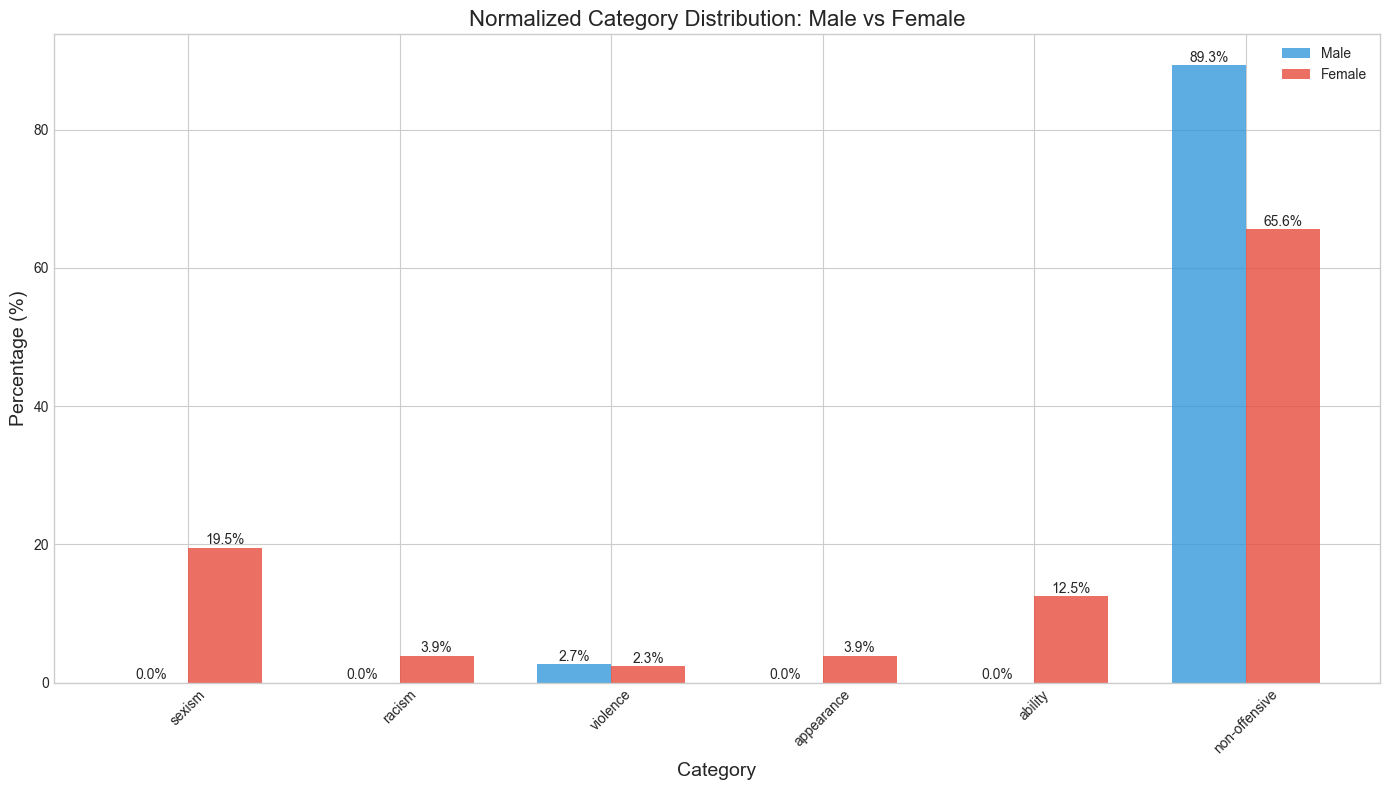

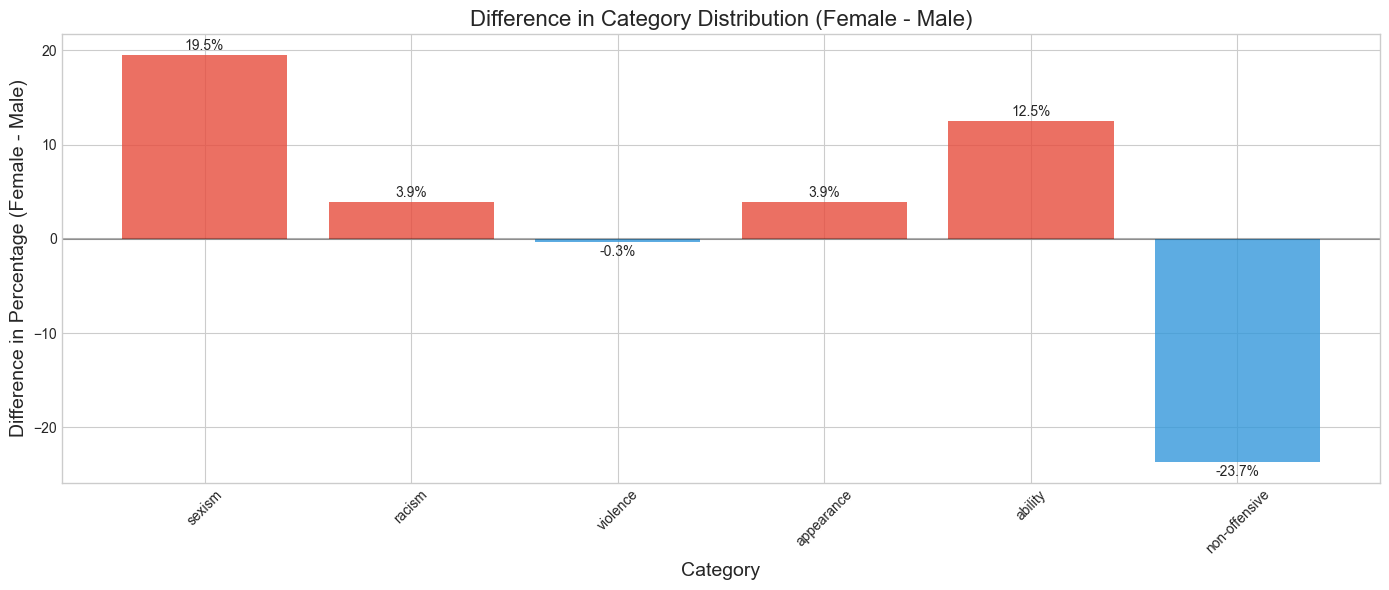

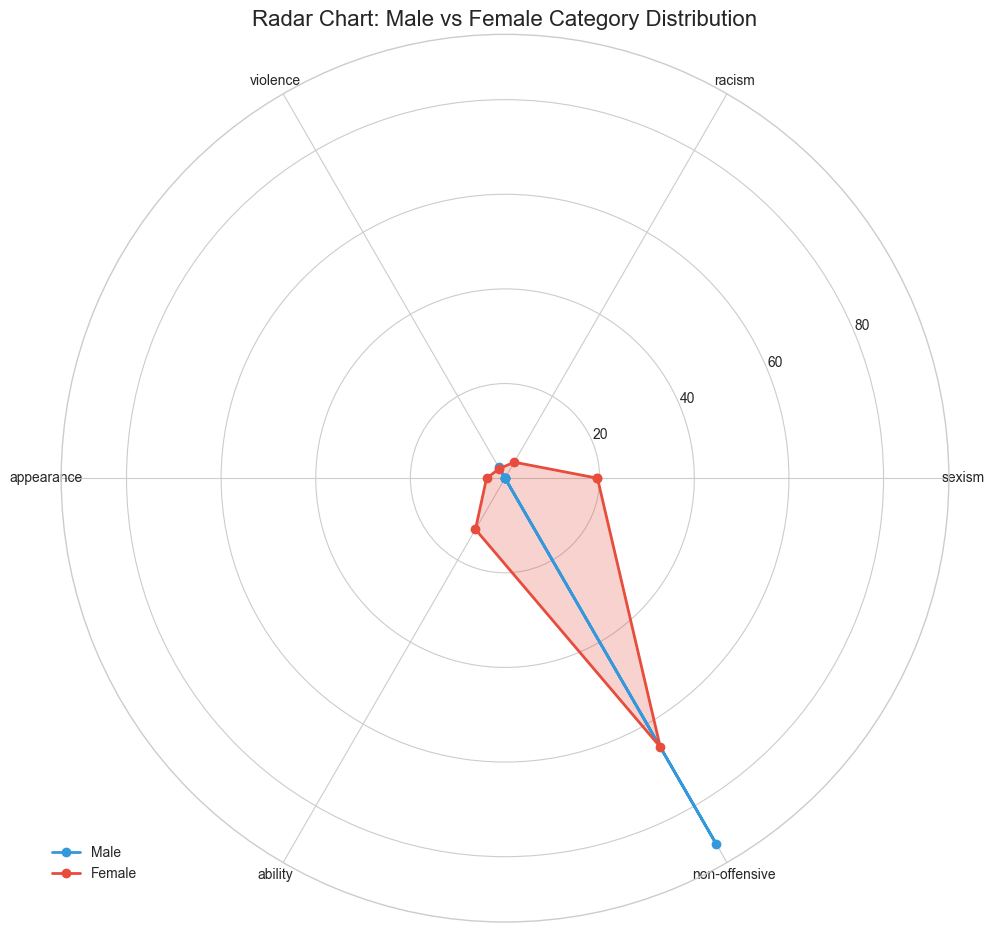

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13108\2645589896.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(categories, rotation=45)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_13108\2645589896.py:169: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(categories, rotation=45)


<Figure size 1400x800 with 0 Axes>

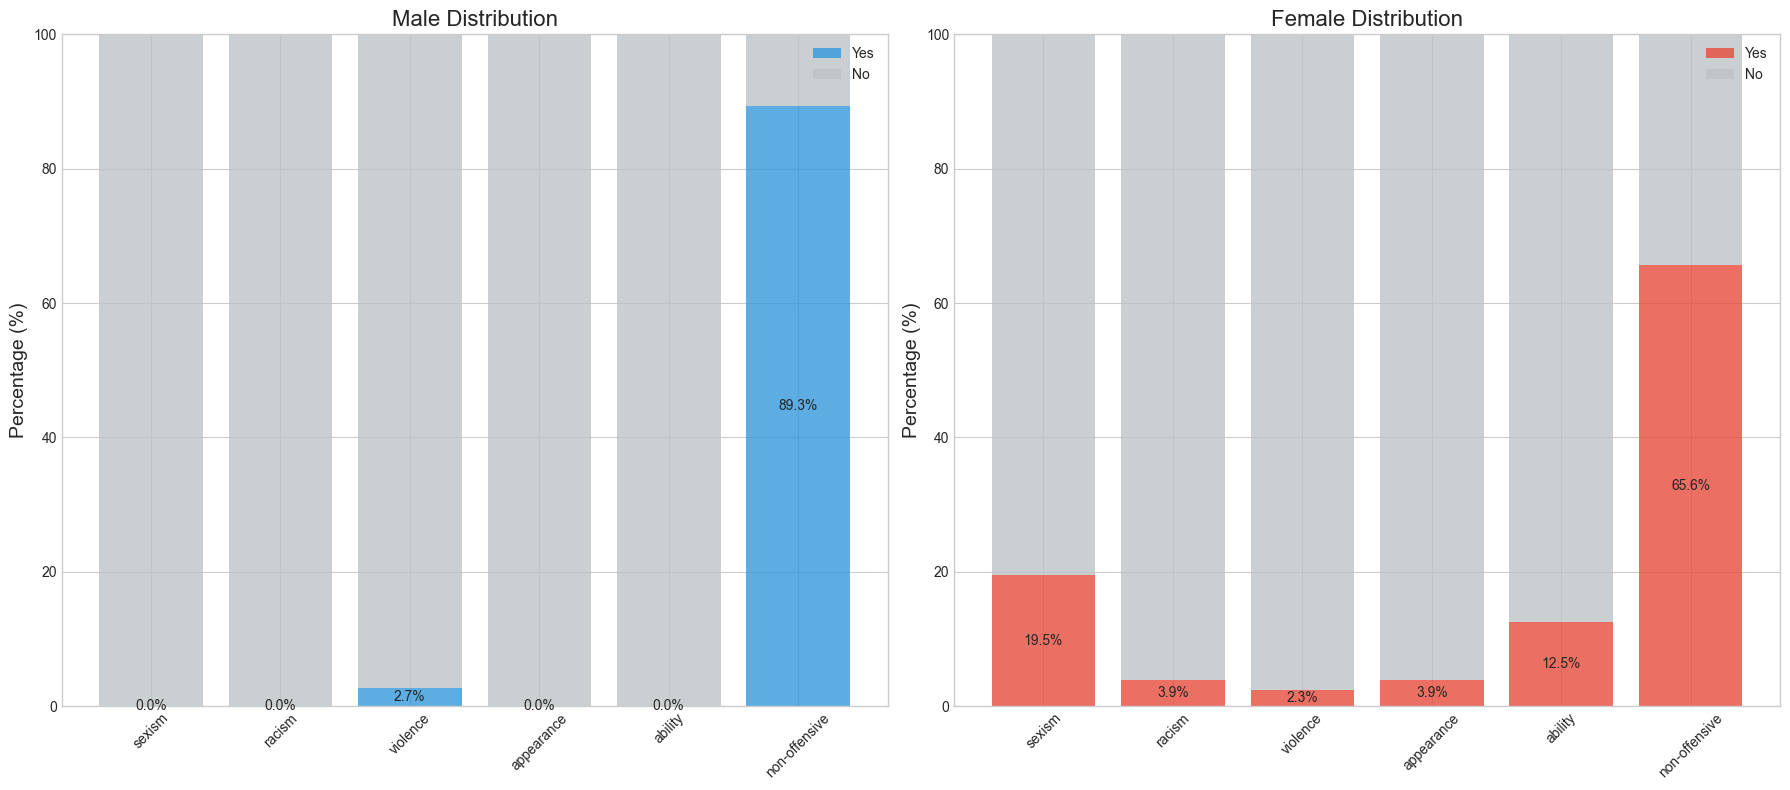

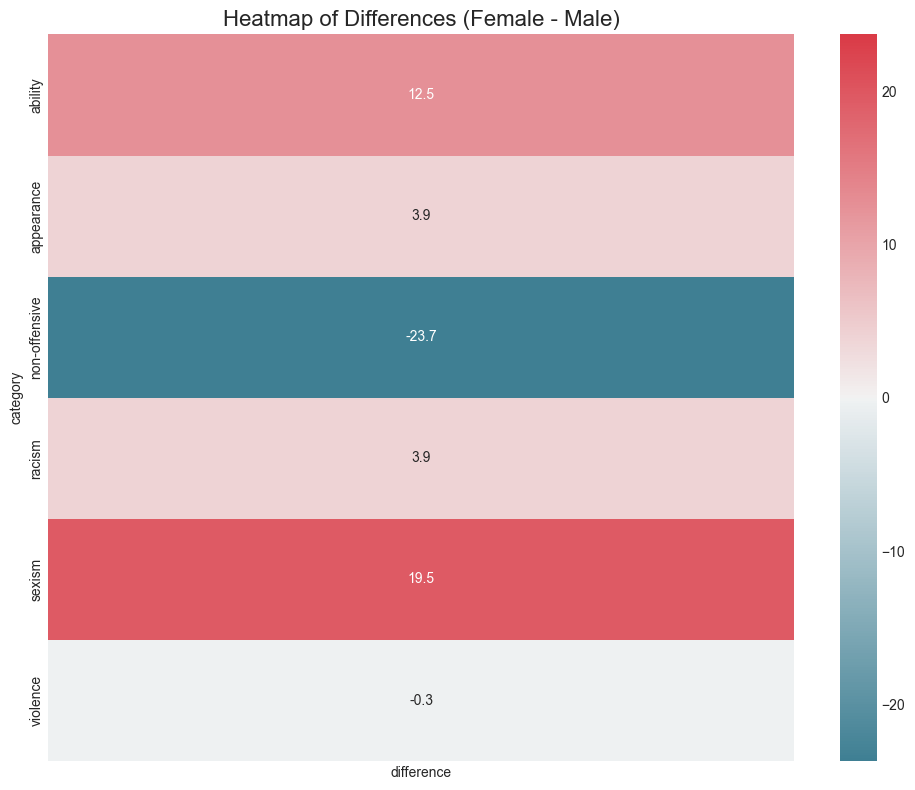

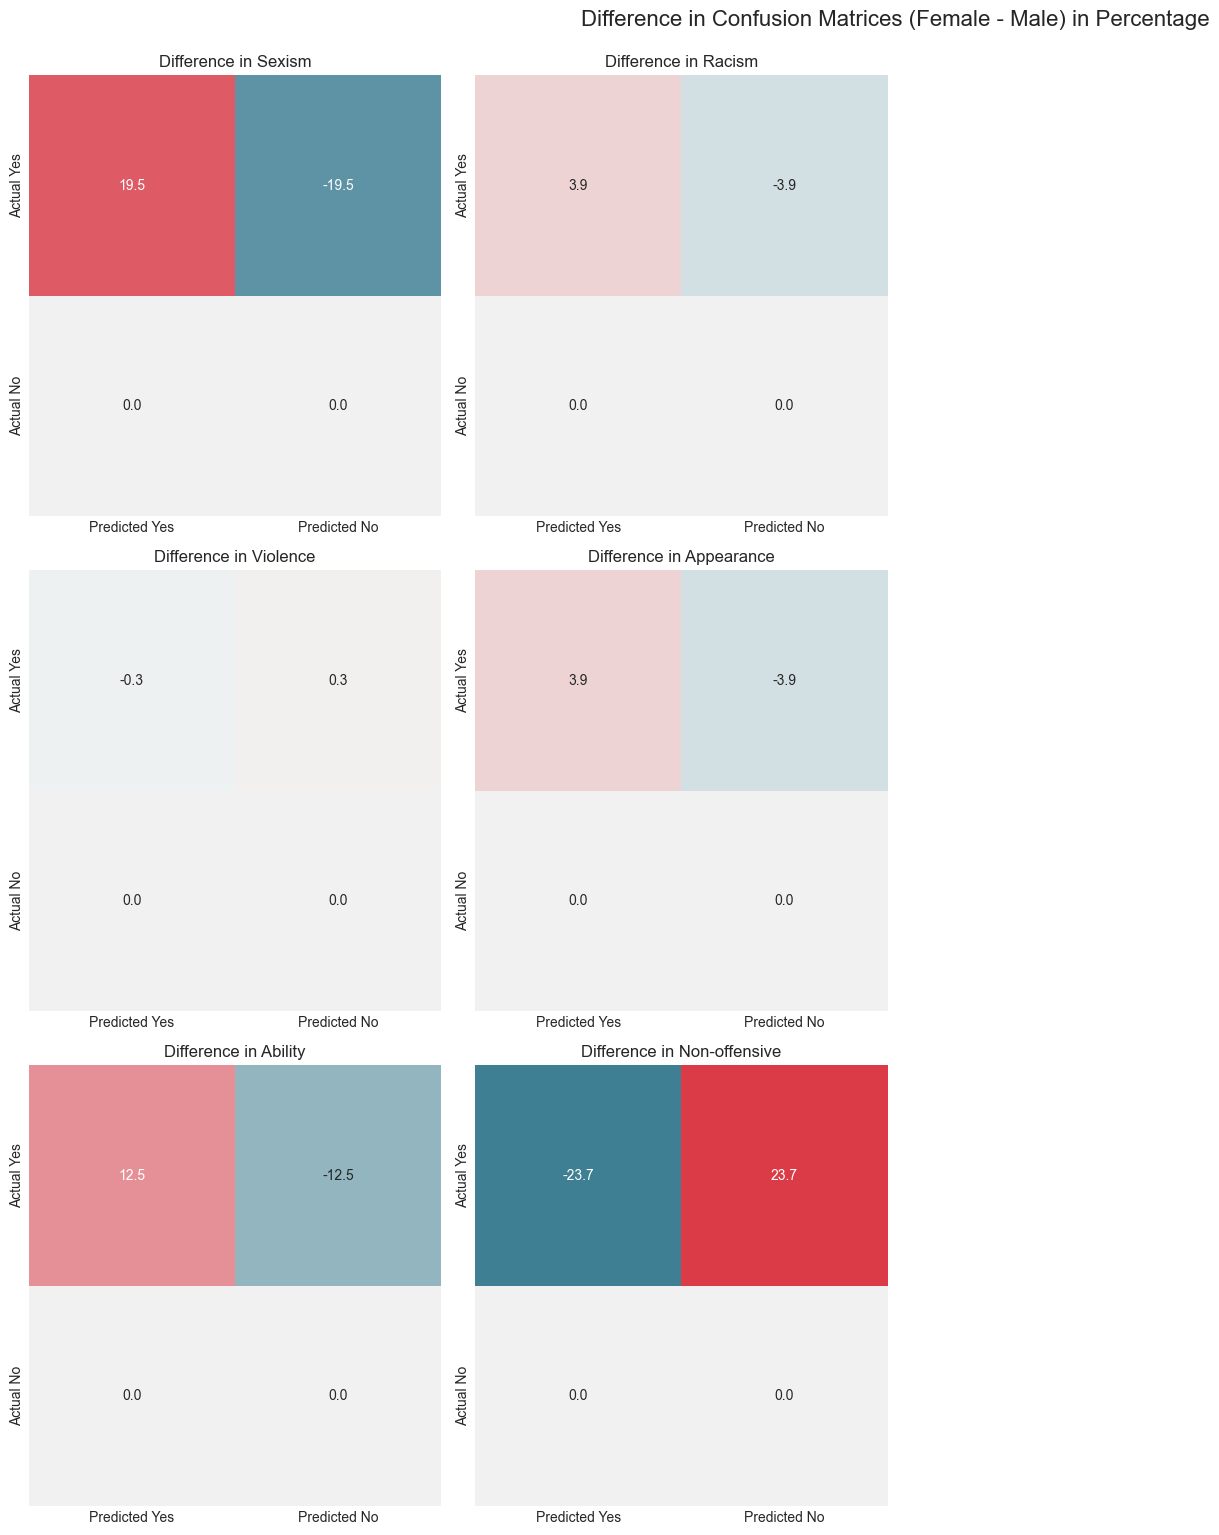

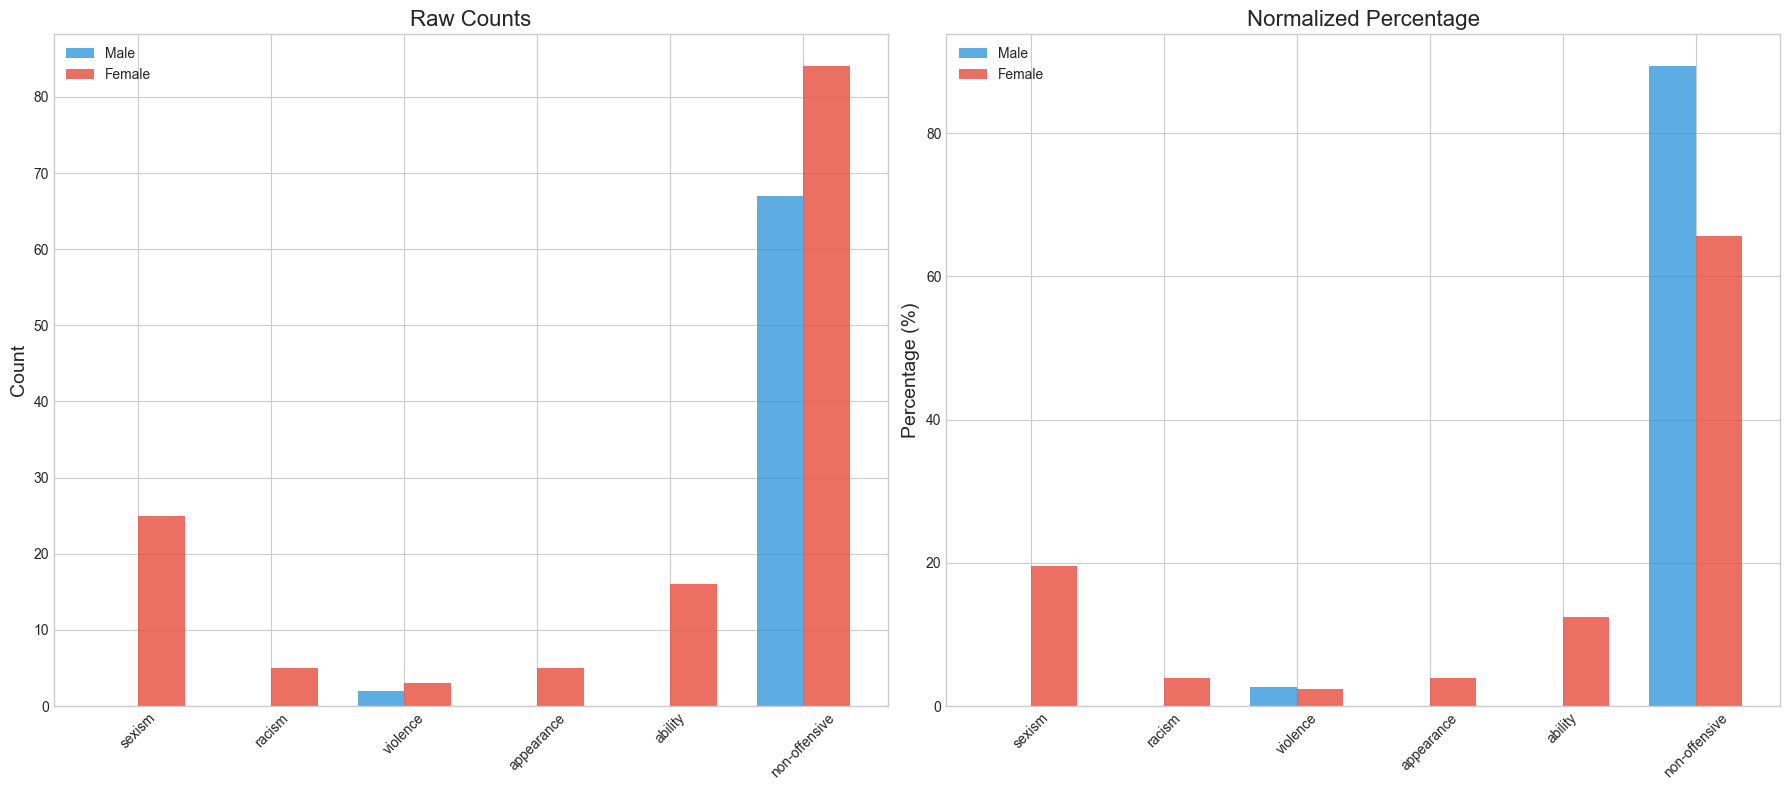

,Category,Male Count,Female Count,Male %,Female %,Difference %
0,sexism,0,25,0.000000,19.53125,19.531250
1,racism,0,5,0.000000,3.90625,3.906250
2,violence,2,3,2.666667,2.34375,-0.322917
3,appearance,0,5,0.000000,3.90625,3.906250
4,ability,0,16,0.000000,12.50000,12.500000
5,non-offensive,67,84,89.333333,65.62500,-23.708333



Statistical Significance Testing (Chi-Square):
Sexism: Chi-square = 14.95, p-value = 0.0001
  ** Statistically significant difference at p < 0.05
Racism: Chi-square = 1.60, p-value = 0.2062
  -- No statistically significant difference
Violence: Chi-square = 0.00, p-value = 1.0000
  -- No statistically significant difference
Appearance: Chi-square = 1.60, p-value = 0.2062
  -- No statistically significant difference
Ability: Chi-square = 8.53, p-value = 0.0035
  ** Statistically significant difference at p < 0.05
Non-offensive: Chi-square = 12.73, p-value = 0.0004
  ** Statistically significant difference at p < 0.05


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Load the datasets
male_df = pd.read_csv('merged_output_male_with_labels.csv')
female_df = pd.read_csv('merged_output_female_with_labels.csv')

# The categories we want to analyze
categories = ["sexism", "racism", "violence", "appearance", "ability", "non-offensive"]

# Print basic information about the datasets
print(f"Male dataset shape: {male_df.shape}")
print(f"Female dataset shape: {female_df.shape}")
print("\nMale dataset sample:")
display(male_df.head(2))
print("\nFemale dataset sample:")
display(female_df.head(2))

# Calculate normalized values (percentage) for each category
def calculate_normalized_stats(male_df, female_df, categories):
    results = []
    
    male_count = len(male_df)
    female_count = len(female_df)
    
    for category in categories:
        # Count occurrences where category equals 1
        male_positive = male_df[category].sum()
        female_positive = female_df[category].sum()
        
        # Normalize to percentages
        male_normalized = (male_positive / male_count) * 100
        female_normalized = (female_positive / female_count) * 100
        
        results.append({
            'category': category,
            'male_raw': male_positive,
            'female_raw': female_positive,
            'male_normalized': male_normalized,
            'female_normalized': female_normalized,
            'difference': female_normalized - male_normalized,
            'male_count': male_count,
            'female_count': female_count
        })
    
    return pd.DataFrame(results)

# Calculate the normalized statistics
stats_df = calculate_normalized_stats(male_df, female_df, categories)
display(stats_df)

# 1. Bar Chart Comparison
plt.figure(figsize=(14, 8))
bar_width = 0.35
x = np.arange(len(categories))

plt.bar(x - bar_width/2, stats_df['male_normalized'], bar_width, label='Male', color='#3498db', alpha=0.8)
plt.bar(x + bar_width/2, stats_df['female_normalized'], bar_width, label='Female', color='#e74c3c', alpha=0.8)

plt.xlabel('Category', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Normalized Category Distribution: Male vs Female', fontsize=16)
plt.xticks(x, categories, rotation=45)
plt.legend()

# Add value labels on the bars
for i, v in enumerate(stats_df['male_normalized']):
    plt.text(i - bar_width/2, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)
    
for i, v in enumerate(stats_df['female_normalized']):
    plt.text(i + bar_width/2, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Difference Chart
plt.figure(figsize=(14, 6))
colors = ['#3498db' if x < 0 else '#e74c3c' for x in stats_df['difference']]
plt.bar(categories, stats_df['difference'], color=colors, alpha=0.8)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Difference in Percentage (Female - Male)', fontsize=14)
plt.title('Difference in Category Distribution (Female - Male)', fontsize=16)
plt.xticks(rotation=45)

# Add value labels on the bars
for i, v in enumerate(stats_df['difference']):
    plt.text(i, v + (0.5 if v >= 0 else -1.5), f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 3. Radar Chart
def create_radar_chart(stats_df, categories):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)
    
    # Compute angles for each category
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Close the circle
    
    # Get male and female values
    male_values = stats_df['male_normalized'].tolist()
    female_values = stats_df['female_normalized'].tolist()
    male_values += male_values[:1]  # Close the circle
    female_values += female_values[:1]  # Close the circle
    
    # Plot male values
    ax.plot(angles, male_values, 'o-', linewidth=2, label='Male', color='#3498db')
    ax.fill(angles, male_values, alpha=0.25, color='#3498db')
    
    # Plot female values
    ax.plot(angles, female_values, 'o-', linewidth=2, label='Female', color='#e74c3c')
    ax.fill(angles, female_values, alpha=0.25, color='#e74c3c')
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Add legend and title
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Radar Chart: Male vs Female Category Distribution', fontsize=16)
    
    plt.tight_layout()
    return fig

radar_fig = create_radar_chart(stats_df, categories)
plt.show()

# 4. Stacked Percentage Chart
plt.figure(figsize=(14, 8))

# Create a matrix of [male_positive, male_negative, female_positive, female_negative]
stacked_data = np.zeros((len(categories), 4))

for i, category in enumerate(categories):
    stacked_data[i, 0] = stats_df.loc[i, 'male_normalized']
    stacked_data[i, 1] = 100 - stats_df.loc[i, 'male_normalized']
    stacked_data[i, 2] = stats_df.loc[i, 'female_normalized']
    stacked_data[i, 3] = 100 - stats_df.loc[i, 'female_normalized']

# Plot stacked charts side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Male data
axes[0].bar(categories, stacked_data[:, 0], color='#3498db', alpha=0.8, label='Yes')
axes[0].bar(categories, stacked_data[:, 1], bottom=stacked_data[:, 0], color='#bdc3c7', alpha=0.8, label='No')
axes[0].set_title('Male Distribution', fontsize=16)
axes[0].set_ylabel('Percentage (%)', fontsize=14)
axes[0].set_ylim(0, 100)
axes[0].legend(loc='upper right')
axes[0].set_xticklabels(categories, rotation=45)

# Female data
axes[1].bar(categories, stacked_data[:, 2], color='#e74c3c', alpha=0.8, label='Yes')
axes[1].bar(categories, stacked_data[:, 3], bottom=stacked_data[:, 2], color='#bdc3c7', alpha=0.8, label='No')
axes[1].set_title('Female Distribution', fontsize=16)
axes[1].set_ylabel('Percentage (%)', fontsize=14)
axes[1].set_ylim(0, 100)
axes[1].legend(loc='upper right')
axes[1].set_xticklabels(categories, rotation=45)

# Add percentage labels
for i, category in enumerate(categories):
    # Male positive
    axes[0].text(i, stacked_data[i, 0]/2, f'{stacked_data[i, 0]:.1f}%', ha='center', va='center', fontsize=10)
    # Female positive
    axes[1].text(i, stacked_data[i, 2]/2, f'{stacked_data[i, 2]:.1f}%', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Heatmap of differences
plt.figure(figsize=(10, 8))
diff_matrix = stats_df.pivot_table(index='category', values=['male_normalized', 'female_normalized', 'difference'])

# Calculate the color range for the heatmap
max_value = max(abs(diff_matrix['difference'].min()), abs(diff_matrix['difference'].max()))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(diff_matrix[['difference']], annot=True, fmt='.1f', cmap=cmap, center=0, vmin=-max_value, vmax=max_value)
plt.title('Heatmap of Differences (Female - Male)', fontsize=16)
plt.tight_layout()
plt.show()

# 6. Confusion matrices for each category
def plot_confusion_matrices(male_df, female_df, categories):
    fig = plt.figure(figsize=(18, 15))
    gs = gridspec.GridSpec(3, 4)
    
    for i, category in enumerate(categories):
        ax = plt.subplot(gs[i//2, i%2])
        
        # Calculate confusion matrix for male data
        male_y_true = np.ones(len(male_df))  # Expected value (assuming all should be 1)
        male_y_pred = male_df[category].values
        male_cm = confusion_matrix(male_y_true, male_y_pred, labels=[1, 0])
        male_cm_normalized = male_cm / male_cm.sum() * 100
        
        # Calculate confusion matrix for female data
        female_y_true = np.ones(len(female_df))  # Expected value (assuming all should be 1)
        female_y_pred = female_df[category].values
        female_cm = confusion_matrix(female_y_true, female_y_pred, labels=[1, 0])
        female_cm_normalized = female_cm / female_cm.sum() * 100
        
        # Calculate difference matrix
        diff_matrix = female_cm_normalized - male_cm_normalized
        
        # Plot the difference matrix
        sns.heatmap(diff_matrix, annot=True, fmt='.1f', cmap=cmap, center=0, 
                    vmin=-max_value, vmax=max_value, cbar=False, ax=ax)
        ax.set_title(f'Difference in {category.capitalize()}', fontsize=12)
        ax.set_xticklabels(['Predicted Yes', 'Predicted No'])
        ax.set_yticklabels(['Actual Yes', 'Actual No'])
    
    plt.tight_layout()
    plt.suptitle('Difference in Confusion Matrices (Female - Male) in Percentage', fontsize=16, y=1.02)
    plt.show()

# Plot confusion matrices
plot_confusion_matrices(male_df, female_df, categories)

# 7. Side-by-Side Raw vs Normalized Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Raw counts
axes[0].bar(np.arange(len(categories)) - bar_width/2, stats_df['male_raw'], bar_width, label='Male', color='#3498db', alpha=0.8)
axes[0].bar(np.arange(len(categories)) + bar_width/2, stats_df['female_raw'], bar_width, label='Female', color='#e74c3c', alpha=0.8)
axes[0].set_xticks(np.arange(len(categories)))
axes[0].set_xticklabels(categories, rotation=45)
axes[0].set_title('Raw Counts', fontsize=16)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend()

# Normalized percentage
axes[1].bar(np.arange(len(categories)) - bar_width/2, stats_df['male_normalized'], bar_width, label='Male', color='#3498db', alpha=0.8)
axes[1].bar(np.arange(len(categories)) + bar_width/2, stats_df['female_normalized'], bar_width, label='Female', color='#e74c3c', alpha=0.8)
axes[1].set_xticks(np.arange(len(categories)))
axes[1].set_xticklabels(categories, rotation=45)
axes[1].set_title('Normalized Percentage', fontsize=16)
axes[1].set_ylabel('Percentage (%)', fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.show()

# 8. Summary statistics table
summary_stats = stats_df[['category', 'male_raw', 'female_raw', 'male_normalized', 'female_normalized', 'difference']]
summary_stats.columns = ['Category', 'Male Count', 'Female Count', 'Male %', 'Female %', 'Difference %']
display(summary_stats)

# 9. Calculate statistical significance using chi-square test
from scipy.stats import chi2_contingency

print("\nStatistical Significance Testing (Chi-Square):")
for category in categories:
    # Create a contingency table for each category
    contingency_table = np.array([
        [stats_df.loc[stats_df['category'] == category, 'male_raw'].values[0], 
         stats_df['male_count'].values[0] - stats_df.loc[stats_df['category'] == category, 'male_raw'].values[0]],
        [stats_df.loc[stats_df['category'] == category, 'female_raw'].values[0], 
         stats_df['female_count'].values[0] - stats_df.loc[stats_df['category'] == category, 'female_raw'].values[0]]
    ])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"{category.capitalize()}: Chi-square = {chi2:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print(f"  ** Statistically significant difference at p < 0.05")
    else:
        print(f"  -- No statistically significant difference")

Columns in male_df: ['Unnamed: 0', 'name', 'demographic', 'video_id', 'comment', 'author', 'like_count', 'published_at', 'sexism', 'racism', 'violence', 'appearance', 'ability', 'non-offensive']
Columns in female_df: ['Unnamed: 0', 'name', 'demographic', 'video_id', 'comment', 'author', 'like_count', 'published_at', 'sexism', 'racism', 'violence', 'appearance', 'ability', 'non-offensive']
--- Original Dataset Info ---
Male dataset shape: (75, 15)
Female dataset shape: (128, 15)
------------------------------

--- Analysis: Commenter Demographic vs. Comment Type ---
Combined dataset shape: (203, 15)

Unique values in 'demographic' column:
demographic
male      140
female     63
Name: count, dtype: int64

Filtered dataset shape (only male/female commenters): (203, 15)


,comment,demographic,sexism,racism,violence,appearance,ability,non-offensive
0,"Ronaldo is Tough, not like messy",male,0,0,0,0,0,1
1,But both are still goats,female,0,0,0,0,0,1
2,BRUH THIS IS FAKE,female,0,0,0,0,0,1



Total comments per commenter demographic:
demographic
female     63
male      140
dtype: int64

Positive counts per category by commenter demographic:


,sexism,racism,violence,appearance,ability,non-offensive
demographic,,,,,,
female,9,0,1,2,4,47
male,16,5,4,3,12,104



Summary Statistics by Commenter Demographic:


,category,male_commenter_normalized,female_commenter_normalized,difference,male_commenter_raw,female_commenter_raw,male_commenter_total,female_commenter_total
0,sexism,11.428571,14.285714,2.857143,16,9,140,63
1,racism,3.571429,0.000000,-3.571429,5,0,140,63
2,violence,2.857143,1.587302,-1.269841,4,1,140,63
3,appearance,2.142857,3.174603,1.031746,3,2,140,63
4,ability,8.571429,6.349206,-2.222222,12,4,140,63
5,non-offensive,74.285714,74.603175,0.317460,104,47,140,63


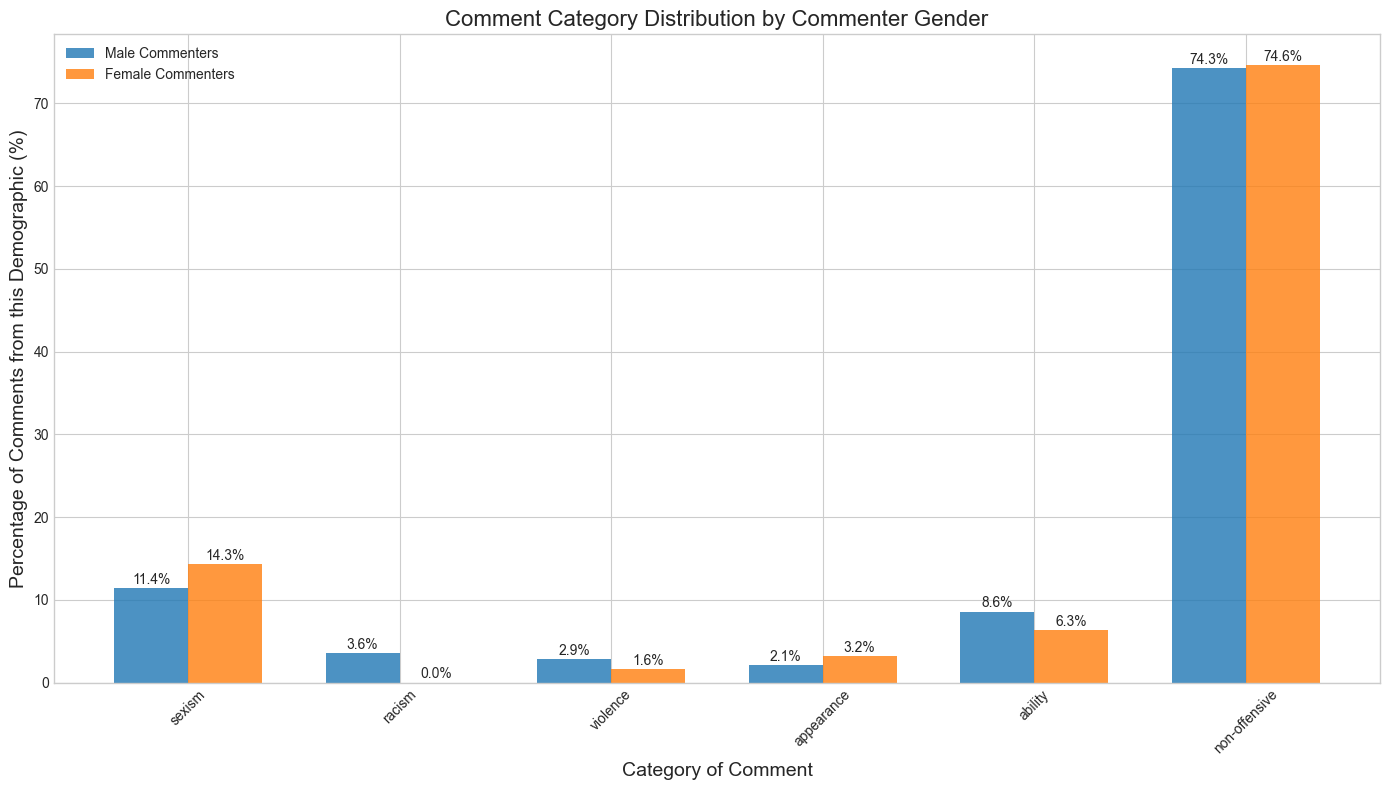

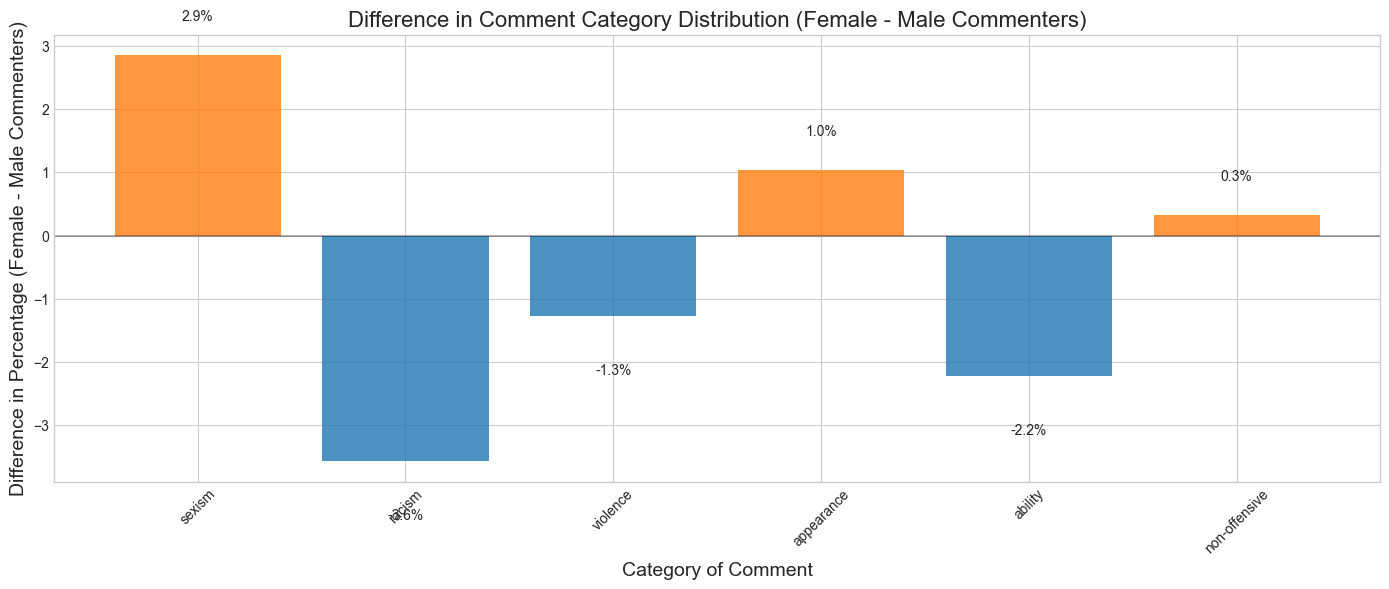


Statistical Significance Testing (Chi-Square) for Commenter Demographic:
Sexism: Chi-square = 0.12, p-value = 0.7321
  -- No statistically significant difference
Racism: Chi-square = 1.06, p-value = 0.3033
  -- No statistically significant difference
Violence: Chi-square = 0.00, p-value = 0.9596
  -- No statistically significant difference
Appearance: Chi-square = 0.00, p-value = 1.0000
  -- No statistically significant difference
Ability: Chi-square = 0.07, p-value = 0.7932
  -- No statistically significant difference
Non-offensive: Chi-square = 0.00, p-value = 1.0000
  -- No statistically significant difference


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
from scipy.stats import chi2_contingency
# Use a specific display function if in environments like Jupyter
try:
    from IPython.display import display
except ImportError:
    display = print # Fallback for non-IPython environments


# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Load the datasets
male_df = pd.read_csv('merged_output_male_with_labels.csv')
female_df = pd.read_csv('merged_output_female_with_labels.csv')

# --- Print column names to identify the correct one ---
print("Columns in male_df:", male_df.columns.tolist()) # Use .tolist() for cleaner output
print("Columns in female_df:", female_df.columns.tolist())
# --- You might need to stop here, identify the name, and then continue ---

# *** IMPORTANT: FIND THE CORRECT TEXT COLUMN NAME FROM THE OUTPUT ABOVE ***
# *** Let's assume it's 'comment_text' for this example. REPLACE 'comment_text' WITH YOUR ACTUAL COLUMN NAME ***
text_column_name = 'comment' # <--- CHANGE THIS if necessary

# Add a column to track the original dataset (target gender) if needed later,
male_df['target_gender'] = 'male'
female_df['target_gender'] = 'female'

# The categories we want to analyze
categories = ["sexism", "racism", "violence", "appearance", "ability", "non-offensive"]

# --- Start of Original Code (for context and potential reuse) ---
print("--- Original Dataset Info ---")
print(f"Male dataset shape: {male_df.shape}")
print(f"Female dataset shape: {female_df.shape}")
print("-" * 30)
# --- End of Original Code Context ---


# --- New Analysis: Commenter Demographic vs. Comment Type ---

print("\n--- Analysis: Commenter Demographic vs. Comment Type ---")

# 1. Combine Data
combined_df = pd.concat([male_df, female_df], ignore_index=True)
print(f"Combined dataset shape: {combined_df.shape}")

# Check if the assumed text column exists after combining
if text_column_name not in combined_df.columns:
     print(f"\nError: The specified text column '{text_column_name}' was not found in the combined DataFrame.")
     print(f"Available columns are: {combined_df.columns.tolist()}")
     # Exit or raise error if the crucial column is missing
     exit()


# 2. Inspect 'demographic' Column
print("\nUnique values in 'demographic' column:")
print(combined_df['demographic'].value_counts())

# Filter for rows where demographic is 'male' or 'female'
valid_demos = ['male', 'female']
demo_filtered_df = combined_df[combined_df['demographic'].isin(valid_demos)].copy()

if demo_filtered_df.empty:
     print("\nError: No rows found with 'demographic' as 'male' or 'female'. Check column values.")
     # Exit or handle appropriately if no data to analyze
else:
    print(f"\nFiltered dataset shape (only male/female commenters): {demo_filtered_df.shape}")
    # *** Use the correct text column name here ***
    display(demo_filtered_df[[text_column_name, 'demographic'] + categories].head(3)) # Show sample

    # 3. Calculate Statistics based on Commenter Demographic
    # (The rest of the calculation code should work fine as it doesn't use the text column)
    demographic_stats = []
    grouped_by_demo = demo_filtered_df.groupby('demographic')
    total_counts_by_demo = grouped_by_demo.size()
    print("\nTotal comments per commenter demographic:")
    print(total_counts_by_demo)

    positive_counts_by_demo = grouped_by_demo[categories].sum()
    print("\nPositive counts per category by commenter demographic:")
    display(positive_counts_by_demo)

    normalized_stats_by_demo = (positive_counts_by_demo.T / total_counts_by_demo * 100).T

    stats_summary_demo = normalized_stats_by_demo.copy()
    stats_summary_demo['total_comments'] = total_counts_by_demo
    for cat in categories:
         stats_summary_demo[f'raw_{cat}'] = positive_counts_by_demo[cat]

    plot_data_demo = []
    for category in categories:
        male_norm = normalized_stats_by_demo.loc['male', category] if 'male' in normalized_stats_by_demo.index else 0
        female_norm = normalized_stats_by_demo.loc['female', category] if 'female' in normalized_stats_by_demo.index else 0
        male_raw = positive_counts_by_demo.loc['male', category] if 'male' in positive_counts_by_demo.index else 0
        female_raw = positive_counts_by_demo.loc['female', category] if 'female' in positive_counts_by_demo.index else 0
        male_total = total_counts_by_demo.loc['male'] if 'male' in total_counts_by_demo.index else 0
        female_total = total_counts_by_demo.loc['female'] if 'female' in total_counts_by_demo.index else 0

        plot_data_demo.append({
            'category': category,
            'male_commenter_normalized': male_norm,
            'female_commenter_normalized': female_norm,
            'difference': female_norm - male_norm,
            'male_commenter_raw': male_raw,
            'female_commenter_raw': female_raw,
            'male_commenter_total': male_total,
            'female_commenter_total': female_total
        })

    demo_stats_df = pd.DataFrame(plot_data_demo)
    print("\nSummary Statistics by Commenter Demographic:")
    display(demo_stats_df)


    # 4. Visualize Results
    # (Visualization code remains the same)

    # 4.1 Bar Chart Comparison (Commenter Demographic)
    plt.figure(figsize=(14, 8))
    bar_width = 0.35
    x = np.arange(len(categories))
    plt.bar(x - bar_width/2, demo_stats_df['male_commenter_normalized'], bar_width, label='Male Commenters', color='#1f77b4', alpha=0.8)
    plt.bar(x + bar_width/2, demo_stats_df['female_commenter_normalized'], bar_width, label='Female Commenters', color='#ff7f0e', alpha=0.8)
    plt.xlabel('Category of Comment', fontsize=14)
    plt.ylabel('Percentage of Comments from this Demographic (%)', fontsize=14)
    plt.title('Comment Category Distribution by Commenter Gender', fontsize=16)
    plt.xticks(x, categories, rotation=45)
    plt.legend()
    plt.ylim(bottom=0)
    for i, v in enumerate(demo_stats_df['male_commenter_normalized']):
        plt.text(i - bar_width/2, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)
    for i, v in enumerate(demo_stats_df['female_commenter_normalized']):
        plt.text(i + bar_width/2, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 4.2 Difference Chart (Commenter Demographic: Female - Male)
    plt.figure(figsize=(14, 6))
    colors = ['#1f77b4' if x < 0 else '#ff7f0e' for x in demo_stats_df['difference']]
    plt.bar(categories, demo_stats_df['difference'], color=colors, alpha=0.8)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('Category of Comment', fontsize=14)
    plt.ylabel('Difference in Percentage (Female - Male Commenters)', fontsize=14)
    plt.title('Difference in Comment Category Distribution (Female - Male Commenters)', fontsize=16)
    plt.xticks(rotation=45)
    y_offset = max(abs(demo_stats_df['difference']).max() * 0.05, 0.5) # Dynamic offset, ensure minimum
    for i, v in enumerate(demo_stats_df['difference']):
        plt.text(i, v + (y_offset if v >= 0 else -y_offset*1.5), f'{v:.1f}%', ha='center', va='bottom' if v >= 0 else 'top', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 5. Statistical Significance Testing (Chi-Square) for Commenter Demographic
    # (Statistical testing code remains the same)
    print("\nStatistical Significance Testing (Chi-Square) for Commenter Demographic:")
    if 'male' in total_counts_by_demo.index and 'female' in total_counts_by_demo.index:
        male_total = total_counts_by_demo['male']
        female_total = total_counts_by_demo['female']

        for category in categories:
            male_positive = positive_counts_by_demo.loc['male', category]
            female_positive = positive_counts_by_demo.loc['female', category]
            male_negative = male_total - male_positive
            female_negative = female_total - female_positive

            contingency_table = np.array([
                [male_positive, male_negative],
                [female_positive, female_negative]
            ])

            try:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"{category.capitalize()}: Chi-square = {chi2:.2f}, p-value = {p:.4f}")
                if p < 0.05:
                    print(f"  ** Statistically significant difference in {category} comments between male and female commenters (p < 0.05)")
                else:
                    print(f"  -- No statistically significant difference")
            except ValueError as e:
                 print(f"{category.capitalize()}: Could not perform Chi-square test. Contingency Table: {contingency_table.tolist()}. Error: {e}")
    else:
        print("Skipping Chi-square tests: Data for both 'male' and 'female' commenters not available in the filtered set.")

Error: Text column 'text' not found in one or both DataFrames.
Male DF columns: ['Unnamed: 0', 'name', 'demographic', 'video_id', 'comment', 'author', 'like_count', 'published_at', 'sexism', 'racism', 'violence', 'appearance', 'ability', 'non-offensive']
Female DF columns: ['Unnamed: 0', 'name', 'demographic', 'video_id', 'comment', 'author', 'like_count', 'published_at', 'sexism', 'racism', 'violence', 'appearance', 'ability', 'non-offensive']

--- Analyzing Commenter Demographics for: Male Target ---
Dataset shape: (75, 14)
Filtered shape (only male, female commenters): (75, 14)

Total comments per commenter demographic (Male Target):
demographic
female    19
male      56
dtype: int64

Positive counts per category by commenter demographic (Male Target):


,sexism,racism,violence,appearance,ability,non-offensive
demographic,,,,,,
female,0,0,0,0,0,19
male,0,0,2,0,0,48



Summary Statistics by Commenter Demographic (Male Target):


,male_commenter_normalized,female_commenter_normalized,difference,male_commenter_raw,female_commenter_raw,male_commenter_total,female_commenter_total
category,,,,,,,
sexism,0.000000,0.0,0.000000,0,0,56,19
racism,0.000000,0.0,0.000000,0,0,56,19
violence,3.571429,0.0,-3.571429,2,0,56,19
appearance,0.000000,0.0,0.000000,0,0,56,19
ability,0.000000,0.0,0.000000,0,0,56,19
non-offensive,85.714286,100.0,14.285714,48,19,56,19


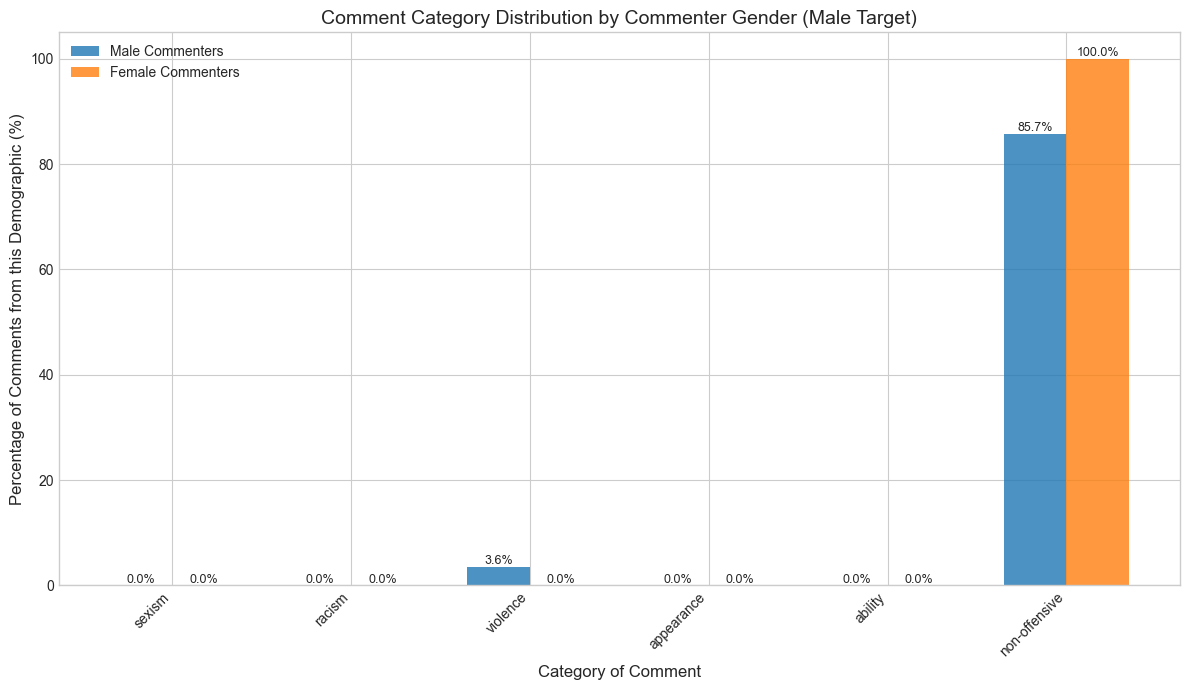

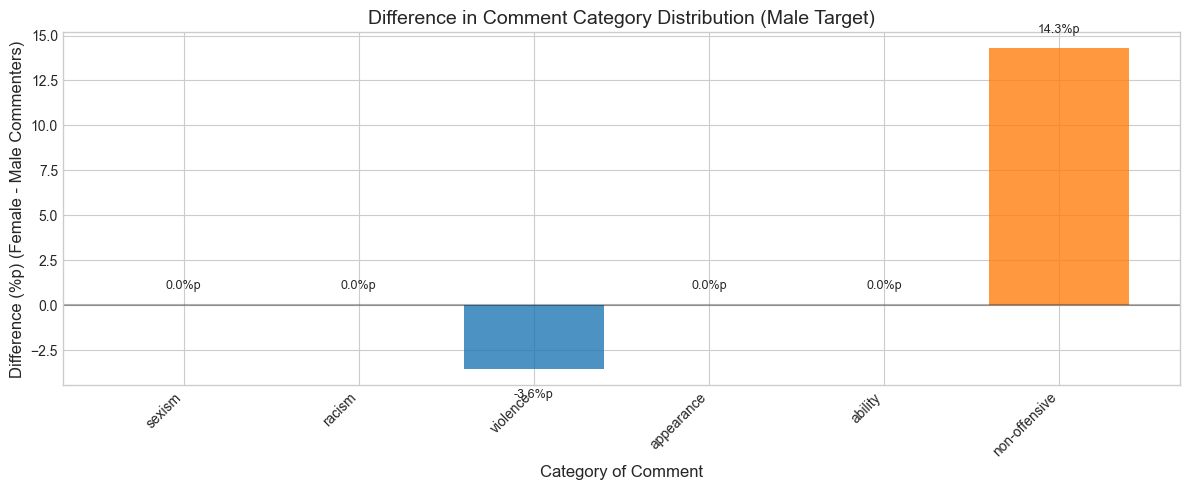


Statistical Significance Testing (Chi-Square) for Commenter Demographic (Male Target):
  Sexism: Could not perform Chi-square test. Table: [[0, 56], [0, 19]]. Error: The internally computed table of expected frequencies has a zero element at (0, 0).
  Racism: Could not perform Chi-square test. Table: [[0, 56], [0, 19]]. Error: The internally computed table of expected frequencies has a zero element at (0, 0).
  Violence: Chi2=0.00, p=0.9912 (Not Significant)
  Appearance: Could not perform Chi-square test. Table: [[0, 56], [0, 19]]. Error: The internally computed table of expected frequencies has a zero element at (0, 0).
  Ability: Could not perform Chi-square test. Table: [[0, 56], [0, 19]]. Error: The internally computed table of expected frequencies has a zero element at (0, 0).
  Non-offensive: Chi2=1.72, p=0.1892 (Not Significant)

--- Analyzing Commenter Demographics for: Female Target ---
Dataset shape: (128, 14)
Filtered shape (only male, female commenters): (128, 14)

Total 

,sexism,racism,violence,appearance,ability,non-offensive
demographic,,,,,,
female,9,0,1,2,4,28
male,16,5,2,3,12,56



Summary Statistics by Commenter Demographic (Female Target):


,male_commenter_normalized,female_commenter_normalized,difference,male_commenter_raw,female_commenter_raw,male_commenter_total,female_commenter_total
category,,,,,,,
sexism,19.047619,20.454545,1.406926,16,9,84,44
racism,5.952381,0.000000,-5.952381,5,0,84,44
violence,2.380952,2.272727,-0.108225,2,1,84,44
appearance,3.571429,4.545455,0.974026,3,2,84,44
ability,14.285714,9.090909,-5.194805,12,4,84,44
non-offensive,66.666667,63.636364,-3.030303,56,28,84,44


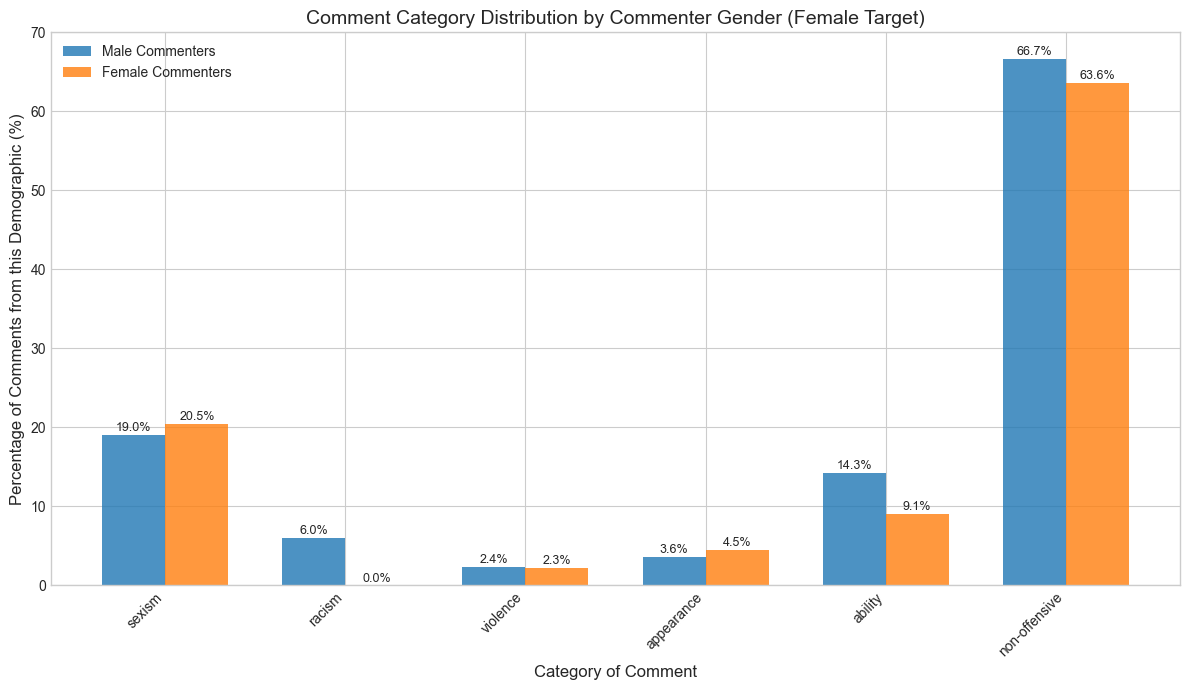

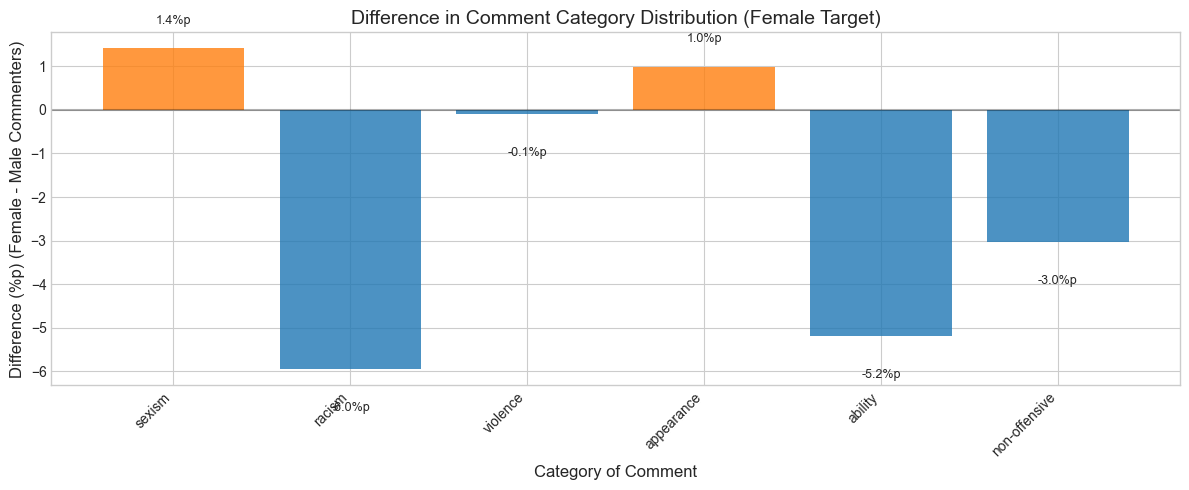


Statistical Significance Testing (Chi-Square) for Commenter Demographic (Female Target):
  Sexism: Chi2=0.00, p=1.0000 (Not Significant)
  Racism: Chi2=1.37, p=0.2417 (Not Significant)
  Violence: Chi2=0.00, p=1.0000 (Not Significant)
  Appearance: Chi2=0.00, p=1.0000 (Not Significant)
  Ability: Chi2=0.32, p=0.5736 (Not Significant)
  Non-offensive: Chi2=0.02, p=0.8832 (Not Significant)

--- Comparing Commenter Behavior Across Target Genders ---

Comparison of (Female - Male) Commenter Difference by Target Gender:


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
from scipy.stats import chi2_contingency
# Use a specific display function if in environments like Jupyter
try:
    from IPython.display import display
except ImportError:
    display = print # Fallback for non-IPython environments

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2") # Reset palette if needed, or use different ones

# Load the datasets
male_df = pd.read_csv('merged_output_male_with_labels.csv')
female_df = pd.read_csv('merged_output_female_with_labels.csv')

# --- Assume text column name is known (replace if needed) ---
# Find this by running: print(male_df.columns)
text_column_name = 'text' # <--- CHANGE THIS based on your actual column name

# --- Check if text column exists ---
if text_column_name not in male_df.columns or text_column_name not in female_df.columns:
     print(f"Error: Text column '{text_column_name}' not found in one or both DataFrames.")
     print(f"Male DF columns: {male_df.columns.tolist()}")
     print(f"Female DF columns: {female_df.columns.tolist()}")
     # Exit or handle error
     exit()
# ---

# The categories we want to analyze
categories = ["sexism", "racism", "violence", "appearance", "ability", "non-offensive"]
valid_demos = ['male', 'female'] # Commenter demographics we are interested in

# --- Function to Analyze Demographics for a Given Target Dataset ---
def analyze_demographics_for_target(df, target_label, categories, text_col, valid_demos):
    """
    Analyzes comment categories based on commenter demographic for a specific dataset.

    Args:
        df (pd.DataFrame): The input DataFrame (e.g., male_df or female_df).
        target_label (str): A label describing the target of comments in this df (e.g., "Male Target").
        categories (list): List of category column names.
        text_col (str): Name of the text column (for displaying sample).
        valid_demos (list): List of demographic values to include (e.g., ['male', 'female']).

    Returns:
        pd.DataFrame: DataFrame containing calculated statistics, or None if insufficient data.
    """
    print(f"\n--- Analyzing Commenter Demographics for: {target_label} ---")
    print(f"Dataset shape: {df.shape}")

    # 1. Filter by relevant commenter demographics
    demo_filtered_df = df[df['demographic'].isin(valid_demos)].copy()

    if demo_filtered_df.empty:
        print(f"No comments found from specified demographics ({valid_demos}) in {target_label} dataset.")
        return None
    print(f"Filtered shape (only {', '.join(valid_demos)} commenters): {demo_filtered_df.shape}")

    # 2. Calculate Statistics
    grouped_by_demo = demo_filtered_df.groupby('demographic')
    total_counts_by_demo = grouped_by_demo.size()

    if len(total_counts_by_demo) < 2:
        print(f"Warning: Only found one demographic group ({total_counts_by_demo.index.tolist()}) in {target_label} dataset. Cannot compare commenter genders.")
        # Optionally, you could return partial stats or just None
        # For simplicity here, we'll proceed but note that comparisons/differences won't be meaningful
        # return None # Uncomment this line if you want to strictly require both groups for stats


    print(f"\nTotal comments per commenter demographic ({target_label}):")
    print(total_counts_by_demo)

    positive_counts_by_demo = grouped_by_demo[categories].sum()
    print(f"\nPositive counts per category by commenter demographic ({target_label}):")
    display(positive_counts_by_demo)

    # Calculate normalized percentages - handle division by zero if a demo has 0 comments
    normalized_stats_by_demo = pd.DataFrame(index=categories, columns=valid_demos, dtype=float)
    for demo in valid_demos:
        if demo in total_counts_by_demo and total_counts_by_demo[demo] > 0:
            normalized_stats_by_demo[demo] = (positive_counts_by_demo.loc[demo] / total_counts_by_demo[demo]) * 100
        elif demo in positive_counts_by_demo.index: # Demo exists but has 0 comments (unlikely with filtering, but safe)
             normalized_stats_by_demo[demo] = 0.0
        # If demo not in index at all, it will be NaN by default, which we handle later

    # Fill NaN with 0 if a demographic group was missing entirely in this subset
    normalized_stats_by_demo = normalized_stats_by_demo.fillna(0.0).T # Transpose back

    # Reformat for easier plotting and comparison
    plot_data_demo = []
    for category in categories:
        male_norm = normalized_stats_by_demo.loc['male', category] if 'male' in normalized_stats_by_demo.index else 0
        female_norm = normalized_stats_by_demo.loc['female', category] if 'female' in normalized_stats_by_demo.index else 0
        male_raw = positive_counts_by_demo.loc['male', category] if 'male' in positive_counts_by_demo.index else 0
        female_raw = positive_counts_by_demo.loc['female', category] if 'female' in positive_counts_by_demo.index else 0
        male_total = total_counts_by_demo.loc['male'] if 'male' in total_counts_by_demo.index else 0
        female_total = total_counts_by_demo.loc['female'] if 'female' in total_counts_by_demo.index else 0

        plot_data_demo.append({
            'category': category,
            'male_commenter_normalized': male_norm,
            'female_commenter_normalized': female_norm,
            'difference': female_norm - male_norm if ('male' in normalized_stats_by_demo.index and 'female' in normalized_stats_by_demo.index) else np.nan, # Only calculate diff if both present
            'male_commenter_raw': male_raw,
            'female_commenter_raw': female_raw,
            'male_commenter_total': male_total,
            'female_commenter_total': female_total
        })

    demo_stats_df = pd.DataFrame(plot_data_demo).set_index('category')
    print(f"\nSummary Statistics by Commenter Demographic ({target_label}):")
    display(demo_stats_df)


    # 3. Visualize Results for this target group

    # Bar Chart Comparison
    plt.figure(figsize=(12, 7))
    bar_width = 0.35
    x = np.arange(len(categories))
    has_male = 'male' in normalized_stats_by_demo.index
    has_female = 'female' in normalized_stats_by_demo.index

    if has_male:
        plt.bar(x - bar_width/2 if has_female else x, demo_stats_df['male_commenter_normalized'], bar_width, label='Male Commenters', color='#1f77b4', alpha=0.8)
        for i, v in enumerate(demo_stats_df['male_commenter_normalized']):
            plt.text(x[i] - bar_width/2 if has_female else x[i], v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

    if has_female:
        plt.bar(x + bar_width/2 if has_male else x, demo_stats_df['female_commenter_normalized'], bar_width, label='Female Commenters', color='#ff7f0e', alpha=0.8)
        for i, v in enumerate(demo_stats_df['female_commenter_normalized']):
            plt.text(x[i] + bar_width/2 if has_male else x[i], v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

    plt.xlabel('Category of Comment', fontsize=12)
    plt.ylabel('Percentage of Comments from this Demographic (%)', fontsize=12)
    plt.title(f'Comment Category Distribution by Commenter Gender ({target_label})', fontsize=14)
    plt.xticks(x, demo_stats_df.index, rotation=45, ha="right")
    plt.legend()
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()

    # Difference Chart (only if both demos exist)
    if has_male and has_female:
        plt.figure(figsize=(12, 5))
        diff_values = demo_stats_df['difference']
        colors = ['#1f77b4' if x < 0 else '#ff7f0e' for x in diff_values]
        plt.bar(demo_stats_df.index, diff_values, color=colors, alpha=0.8)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.xlabel('Category of Comment', fontsize=12)
        plt.ylabel('Difference (%p) (Female - Male Commenters)', fontsize=12)
        plt.title(f'Difference in Comment Category Distribution ({target_label})', fontsize=14)
        plt.xticks(rotation=45, ha="right")
        y_offset = max(abs(diff_values).max() * 0.05, 0.5) # Dynamic offset
        for i, v in enumerate(diff_values):
            plt.text(i, v + (y_offset if v >= 0 else -y_offset*1.5), f'{v:.1f}%p', ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping difference plot for {target_label} as both male and female commenter data are not present.")

    # 4. Statistical Significance Testing (Chi-Square) within this target group
    print(f"\nStatistical Significance Testing (Chi-Square) for Commenter Demographic ({target_label}):")
    if has_male and has_female:
        male_total = demo_stats_df['male_commenter_total'].iloc[0] # Totals are same for all rows
        female_total = demo_stats_df['female_commenter_total'].iloc[0]

        # Check if totals are > 0 before proceeding
        if male_total > 0 and female_total > 0:
             for category in categories:
                male_positive = demo_stats_df.loc[category, 'male_commenter_raw']
                female_positive = demo_stats_df.loc[category, 'female_commenter_raw']
                male_negative = male_total - male_positive
                female_negative = female_total - female_positive

                contingency_table = np.array([[male_positive, male_negative], [female_positive, female_negative]])

                try:
                    chi2, p, dof, expected = chi2_contingency(contingency_table)
                    print(f"  {category.capitalize()}: Chi2={chi2:.2f}, p={p:.4f}", end="")
                    if p < 0.05:
                        print(" ** (Significant)")
                    else:
                        print(" (Not Significant)")
                except ValueError as e:
                    print(f"  {category.capitalize()}: Could not perform Chi-square test. Table: {contingency_table.tolist()}. Error: {e}")
        else:
             print("Skipping Chi-square tests: Zero total comments for one or both demographic groups.")

    else:
        print("Skipping Chi-square tests: Data for both 'male' and 'female' commenters not available.")

    return demo_stats_df

# --- Run Analysis Separately ---

stats_male_target = analyze_demographics_for_target(male_df, "Male Target", categories, text_column_name, valid_demos)
stats_female_target = analyze_demographics_for_target(female_df, "Female Target", categories, text_column_name, valid_demos)

# --- Compare Results Across Targets ---

print("\n--- Comparing Commenter Behavior Across Target Genders ---")

if stats_male_target is not None and stats_female_target is not None:
    # Combine the 'difference' columns for comparison
    comparison_df = pd.DataFrame({
        'Difference (Female - Male Commenter %) on Male Target': stats_male_target['difference'],
        'Difference (Female - Male Commenter %) on Female Target': stats_female_target['difference']
    })
    comparison_df['Diff_of_Differences'] = comparison_df['Difference (Female - Male Commenter %) on Female Target'] - comparison_df['Difference (Female - Male Commenter %) on Male Target']


    print("\nComparison of (Female - Male) Commenter Difference by Target Gender:")
    display(comparison_df.style.format("{:.1f}%p").highlight_null(null_color='lightgrey'))

    # Plot the comparison of differences
    plt.figure(figsize=(14, 7))
    bar_width = 0.35
    x = np.arange(len(categories))

    plt.bar(x - bar_width/2, comparison_df['Difference (Female - Male Commenter %) on Male Target'], bar_width,
            label='Diff (F-M) on Male Target', color='#a6cee3', alpha=0.8) # Light Blue
    plt.bar(x + bar_width/2, comparison_df['Difference (Female - Male Commenter %) on Female Target'], bar_width,
            label='Diff (F-M) on Female Target', color='#fdbf6f', alpha=0.8) # Light Orange

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=0.8)
    plt.xlabel('Category of Comment', fontsize=12)
    plt.ylabel('Difference (%p) (Female Commenter % - Male Commenter %)', fontsize=12)
    plt.title('Comparison: How Commenter Gender Difference Varies by Target Gender', fontsize=14)
    plt.xticks(x, comparison_df.index, rotation=45, ha="right")
    plt.legend()

    # Add value labels (optional, can get cluttered)
    for i, (v_male_t, v_female_t) in enumerate(zip(comparison_df['Difference (Female - Male Commenter %) on Male Target'],
                                                  comparison_df['Difference (Female - Male Commenter %) on Female Target'])):
        if not pd.isna(v_male_t):
             plt.text(x[i] - bar_width/2, v_male_t + (0.3 if v_male_t >= 0 else -0.7), f'{v_male_t:.1f}', ha='center', va='bottom' if v_male_t >= 0 else 'top', fontsize=8)
        if not pd.isna(v_female_t):
             plt.text(x[i] + bar_width/2, v_female_t + (0.3 if v_female_t >= 0 else -0.7), f'{v_female_t:.1f}', ha='center', va='bottom' if v_female_t >= 0 else 'top', fontsize=8)


    plt.tight_layout()
    plt.show()

    # Optional: Plot the raw percentages for all 4 groups if needed for clarity
    # This can get busy, but shows the underlying numbers
    combined_stats = pd.DataFrame({
        ('Male Target', 'Male Commenter %'): stats_male_target['male_commenter_normalized'],
        ('Male Target', 'Female Commenter %'): stats_male_target['female_commenter_normalized'],
        ('Female Target', 'Male Commenter %'): stats_female_target['male_commenter_normalized'],
        ('Female Target', 'Female Commenter %'): stats_female_target['female_commenter_normalized'],
    })
    print("\nCombined Normalized Percentages:")
    display(combined_stats.style.format("{:.1f}%"))

    combined_stats.plot(kind='bar', figsize=(15, 8), width=0.8,
                         color=['#1f77b4', '#ff7f0e', '#aec7e8', '#ffbb78'], alpha=0.8) # M-M, F-M, M-F, F-F
    plt.title('Normalized Comment Category Percentage by Commenter and Target Gender', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xlabel('Category of Comment', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title='(Target, Commenter)', loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for legend
    plt.show()


else:
    print("\nSkipping comparison as analysis for one or both target datasets failed or had insufficient data.")